<a href="https://colab.research.google.com/github/snad0/flower-detection/blob/master/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
paths = {
    'IMAGE_PATH': os.path.join('images'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow','models'),
 }

In [ ]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
IMAGE_PATH = os.path.join("images")
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

training/
training/archive.tar.gz
training/daisy/
training/dandelion/
training/rose/
training/sunflower/
training/tulip/
training/tulip/100930342_92e8746431_n.jpg
training/tulip/10094729603_eeca3f2cb6.jpg
training/tulip/10094731133_94a942463c.jpg
training/tulip/10128546863_8de70c610d.jpg
training/tulip/10163955604_ae0b830975_n.jpg
training/tulip/10164073235_f29931d91e.jpg
training/tulip/10686568196_b1915544a8.jpg
training/tulip/107693873_86021ac4ea_n.jpg
training/tulip/10791227_7168491604.jpg
training/tulip/10995953955_089572caf0.jpg
training/tulip/110147301_ad921e2828.jpg
training/tulip/112334842_3ecf7585dd.jpg
training/tulip/112428665_d8f3632f36_n.jpg
training/tulip/112428919_f0c5ad7d9d_n.jpg
training/tulip/112650879_82adc2cc04_n.jpg
training/tulip/112651128_7b5d39a346_m.jpg
training/tulip/112951022_4892b1348b_n.jpg
training/tulip/112951086_150a59d499_n.jpg
training/tulip/113291410_1bdc718ed8_n.jpg
training/tulip/113902743_8f537f769b_n.jpg
training/tulip/113960470_38fab8f2fb_m.jpg
tr

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50


In [ ]:
dataset=tf.keras.utils.image_dataset_from_directory("training",
                                           shuffle=True,
                                            image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                            batch_size=BATCH_SIZE
                                           )

Found 4317 files belonging to 5 classes.


In [ ]:
class_names= dataset.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
len(dataset)

135

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[4 1 2 0 4 1 4 4 4 3 0 3 0 3 4 2 1 0 0 4 1 4 1 3 1 1 1 1 0 4 1 0]
[[[  3.875       9.125       4.625    ]
  [  5.625      13.75        4.625    ]
  [  4.375      14.375       3.375    ]
  ...
  [198.375     206.125     188.25     ]
  [219.        244.875     247.       ]
  [225.625     211.75      207.125    ]]

 [[  5.090576   10.340576    5.840576 ]
  [  4.315918   12.440918    3.315918 ]
  [  5.8710938  15.871094    4.8710938]
  ...
  [204.8269    217.90674   210.22388  ]
  [226.85449   245.43604   239.51953  ]
  [208.41992   199.59424   187.9563   ]]

 [[  4.847412   10.097412    5.597412 ]
  [  8.298096   15.988037    6.863037 ]
  [  6.8100586  16.012451    5.737549 ]
  ...
  [212.65576   224.34033   229.87915  ]
  [232.25537   241.2019    229.31396  ]
  [178.76929   177.7351    155.5415   ]]

 ...

 [[107.59839   142.1206     20.923096 ]
  [123.394775  151.65234    34.974365 ]
  [132.75635   154.96411    37.598877 ]
  ...
  [ 18.221191   38.279053   12.047607 ]


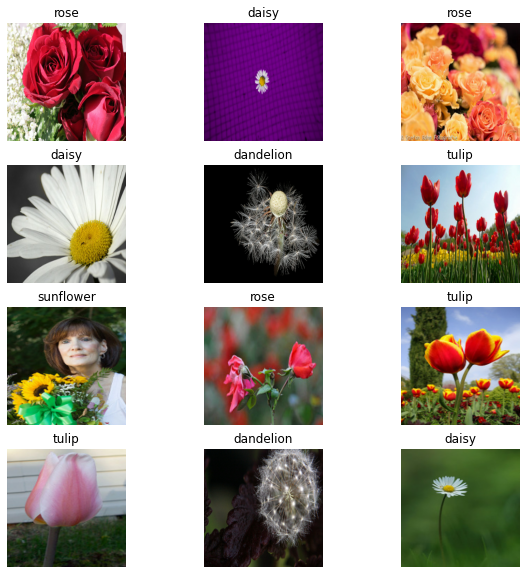

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax= plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size, seed=12)
  train_size=int(ds_size*train_split)
  val_size=int(ds_size*val_split)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds, test_ds, val_ds

In [ ]:
train_ds, test_ds, val_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(test_ds)

14

In [ ]:
resize_and_rescale=tf.keras.Sequential([
                                        layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
                                        layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
               layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
               layers.experimental.preprocessing.RandomRotation(0.2)                       
])

In [ ]:
n_classes=5
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model=models.Sequential([
            resize_and_rescale,
            data_augmentation,

            layers.Conv2D(32,(3,3), activation="relu", input_shape=input_shape),
            layers.MaxPooling2D((2,2)),

            layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,kernel_size=(3,3), activation="relu"),
            layers.MaxPooling2D((2,2)),
            
            layers.Conv2D(64,(3,3), activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,(3,3), activation="relu"),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64,(3,3), activation="relu"),
            layers.MaxPooling2D((2,2)),

            layers.Flatten(),
            layers.Dense(64,activation="relu"),

            layers.Dense(n_classes, activation="softmax")

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
108/108 [==============================] - 30s 207ms/step - loss: 0.4079 - accuracy: 0.8436 - val_loss: 0.3653 - val_accuracy: 0.8341
Epoch 2/10
108/108 [==============================] - 30s 207ms/step - loss: 0.4193 - accuracy: 0.8410 - val_loss: 0.3585 - val_accuracy: 0.8692
Epoch 3/10
108/108 [==============================] - 30s 206ms/step - loss: 0.4479 - accuracy: 0.8303 - val_loss: 0.3565 - val_accuracy: 0.8750
Epoch 4/10
108/108 [==============================] - 30s 206ms/step - loss: 0.4032 - accuracy: 0.8413 - val_loss: 0.3661 - val_accuracy: 0.8702
Epoch 5/10
108/108 [==============================] - 30s 207ms/step - loss: 0.4036 - accuracy: 0.8455 - val_loss: 0.3086 - val_accuracy: 0.8894
Epoch 6/10
108/108 [==============================] - 30s 208ms/step - loss: 0.3920 - accuracy: 0.8509 - val_loss: 0.3399 - val_accuracy: 0.8750
Epoch 7/10
108/108 [==============================] - 32s 224ms/step - loss: 0.3834 - accuracy: 0.8585 - val_loss: 0.4294 - val_ac

In [ ]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy()) #Converted image into an array
    img_array= tf.expand_dims(img_array,0) #created batch
    
    predictions = model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence= round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

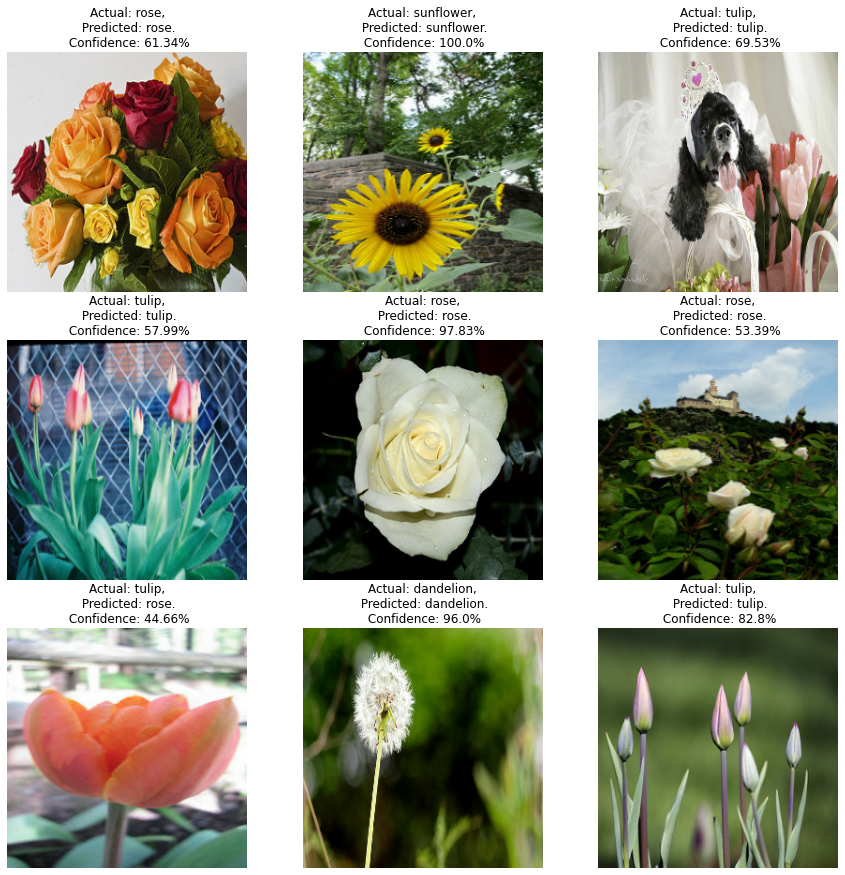

In [ ]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1/assets


In [ ]:
model.save("flowers.h5")

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}